

> **Name:** tmp
> **Student ID:** tmp





### Question 1

1. Normalize the data using StandardScaler from sklearn. [0.5]
2. Split the multivariate data into training/validation data (20% validation data) and plot train error and validation error as a function of the lambda regularizer. [1]
3. What is the best lambda where the best fit occurs? Use this best lambda from here on out. [Note: You may be surprised by the best lambda here - this won't be the case for all datasets.] [1]

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import load_boston
dataset = load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df.shape

(506, 13)

In [6]:
target = pd.DataFrame(dataset.target, columns = ['Target Value'])
print(target.head)

<bound method NDFrame.head of      Target Value
0            24.0
1            21.6
2            34.7
3            33.4
4            36.2
..            ...
501          22.4
502          20.6
503          23.9
504          22.0
505          11.9

[506 rows x 1 columns]>


In [7]:
#splitting the data (80%/20%) train test ration

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.2, random_state = 0)

In [8]:
#normalization; fitting on training set and trasnforming both training and testing set

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_train[0])

(404, 13)
[-0.37257438 -0.49960763 -0.70492455  3.66450153 -0.42487874  0.93567804
  0.69366877 -0.4372179  -0.16224243 -0.56165616 -0.48463784  0.3716906
 -0.41100022]


In [9]:
#adding the bias term 1 to both test and training set
X_train = np.vstack((np.ones(np.shape(X_train)[0]), X_train.T)).T
X_test =  np.vstack((np.ones(np.shape(X_test)[0]), X_test.T)).T
print(X_train.shape)
print(X_train[0])

(404, 14)
[ 1.         -0.37257438 -0.49960763 -0.70492455  3.66450153 -0.42487874
  0.93567804  0.69366877 -0.4372179  -0.16224243 -0.56165616 -0.48463784
  0.3716906  -0.41100022]


In [10]:
def mse(y_actual, y_pred):
  return mean_squared_error(y_actual, y_pred)

In [11]:
lambda_ = range(0,101)
f = X_train.shape[1]
train_error = []
test_error = []

In [12]:
for l in lambda_:
  #training with regularization term in J(theta) 
  w = np.dot(np.linalg.inv(np.dot(X_train.T, X_train) + (l)*np.identity(f)), np.dot(X_train.T, y_train))
  y_pred_train = np.dot(X_train, w)

  #training error: mean square error
  train_error.append(mse(y_train, y_pred_train))
  
  #test/validation error: mean square error
  y_pred_test = np.dot(X_test, w)
  test_error.append(mse(y_test, y_pred_test))

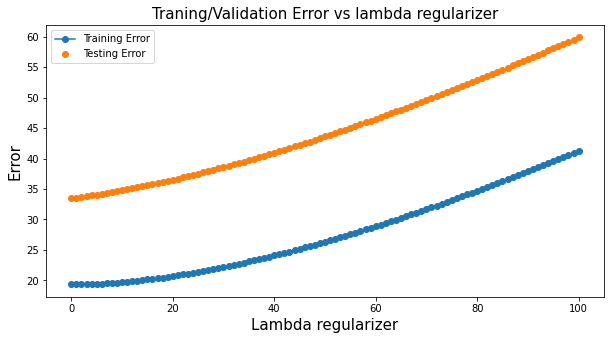

In [13]:
plt.figure(figsize= (10,5))
plt.plot(lambda_, train_error,  'o-', label='Training Error')
plt.plot(lambda_, test_error, 'o', label = 'Testing Error' )
plt.legend()
plt.ylabel('Error', size = 15)
plt.xlabel('Lambda regularizer', size = 15)
plt.title('Traning/Validation Error vs lambda regularizer', size = 15)
plt.show()

In [14]:
#choosing lambda such that testing error is minimum
min_error = min(test_error)
l = test_error.index(min_error)

In [15]:
print("Lambda where best fit occurs for testing data: ", l, 'with minimum error on test data: ', round(min_error,2))

Lambda where best fit occurs for testing data:  0 with minimum error on test data:  33.45


In [16]:
#checking for lambda such that training error is minimum
min_error_train = min(train_error)
l = train_error.index(min_error_train)

In [17]:
print("Lambda where best fit occurs for testing data: ", l, 'with minimum error on test data: ', round(min_error_train,2))

Lambda where best fit occurs for testing data:  0 with minimum error on test data:  19.33


Thus, for both testing set and training set, error is minimum with lambda = 0

### Question 2

1. Derive the gradient of the $L_2$ regularized objective for Linear Regression, $\frac{\partial}{\partial \theta_j}J(\theta)$. Show your work (either by using in-line equations like we do here, or taking a picture of your work, and emdedding it in the notebook). [1]

Note: please do not run the next cell

In [19]:
'''
import cv2

plt.figure(figsize = (20,18))
img = cv2.imread("Q2.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.axis('off')
plt.show()
'''

'\nimport cv2\n\nplt.figure(figsize = (20,18))\nimg = cv2.imread("Q2.jpg")\nimg_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)\nplt.imshow(img_cvt)\nplt.axis(\'off\')\nplt.show()\n'

### Question 3

1. Implement batch gradient descent for linear regression using a fixed learning rate $\eta$ of 1e-2. [1.5]

2. Run the gradient descent for a fixed number of epochs (based on convergence) and verify that the results closely approximate the matrix solution with the same lambda. [1]

In [20]:
alpha = 0.01  #learning rate


y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

#n = number of samples and m is the number of features + bias term
n,m = X_train.shape

epochs = 1000

cost = np.ones(epochs)

theta = np.zeros((m,1))


In [21]:
print(theta)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [22]:
def BGD(X,y, alpha, epochs, l):

  # n is number of samples for training, m is number of features plus bias term
  n,m = X.shape
  #print("regularization constant lambda is ", l)
  cost = np.ones(epochs)

  #intializing w
  np.random.seed(42)
  w = np.random.randn(m,1)
  for iter in range(epochs):
    #print(iter)
    h = np.dot(X, w) # hypothesis function
    y = y.reshape(n,1)

    diff = (h-y)

    #re-evaluate weights based on hypothesis
    for j in range(m):
        J = np.dot(diff.T,X[:,j])
        grad = 1/(X.shape[0])*(J+ l*w[j])
        w[j] = w[j] - alpha*grad
        error = mse(y, np.dot(X, w))
        train_error.append(error)     

    #cost function; l = 0 therefore cost function returns the mean squared error
    cost[iter] =  0.5/n*(sum(np.square(diff)) + l*sum(np.square(w)) )

  return cost,w

In [23]:
y_test.shape

(102, 1)

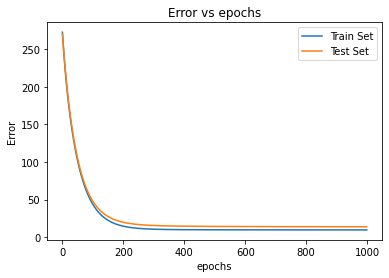

In [24]:
cost_train, theta_train = BGD(X_train, y_train, alpha,  epochs, l)
cost_test, theta_test = BGD(X_test, y_test, alpha,  epochs, l)
plt.plot(cost_train , label = 'Train Set')
plt.plot(cost_test, label = 'Test Set')
plt.title('Error vs epochs')
plt.xlabel('epochs')
plt.ylabel('Error')
plt.legend()
plt.show()


Thus, training set starts converging at around 200 iterations

In [25]:
y_pred_BGD = np.dot(X_test, theta_test)

In [26]:
f = X_train.shape[1]

In [27]:
#analytical weights
w = np.dot(np.linalg.inv(np.dot(X_train.T, X_train) + (l)*np.identity(f)), np.dot(X_train.T, y_train))
print(w.shape)
y_pred_test = np.dot(X_test, w)

(14, 1)


In [28]:
error_mse_predictions = mse(y_pred_BGD, y_pred_test)
print("Mean sqaured error for predictions using batch gradient descent and analytical solution: ", error_mse_predictions)

Mean sqaured error for predictions using batch gradient descent and analytical solution:  6.512189407622616


In [29]:
#print(abs((w-theta_train)/w)*100)
#conisdering weights from analytical solution as a reference

percent_error = abs((w-theta_train)/w)*100
display("Percent difference between weights for analytical and through BGD methods is:\n ", percent_error)

'Percent difference between weights for analytical and through BGD methods is:\n '

array([[4.22229066e-03],
       [1.22105327e+01],
       [1.61992716e+01],
       [3.15918677e+02],
       [6.30746625e+00],
       [1.88444106e+01],
       [5.51802403e+00],
       [4.12651499e+00],
       [1.35450222e+01],
       [3.23558916e+01],
       [3.12741327e+01],
       [2.48948311e+00],
       [6.03071546e-03],
       [2.53632908e-01]])

While few have high difference of order 1e2, most of them are below 20% for epochs 1000 (where the training set has already converged)

### Question 4

1. Plot training error performance vs. number of epochs as a function of learning rate $\eta$ for a range of values {1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1} with each $\eta$ being a different line. [1]

For very low $\eta$, gradient descent should be slow to converge.  For very high $\eta$, the error might be very unstable (i.e., not decreasing on every epoch).

(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)


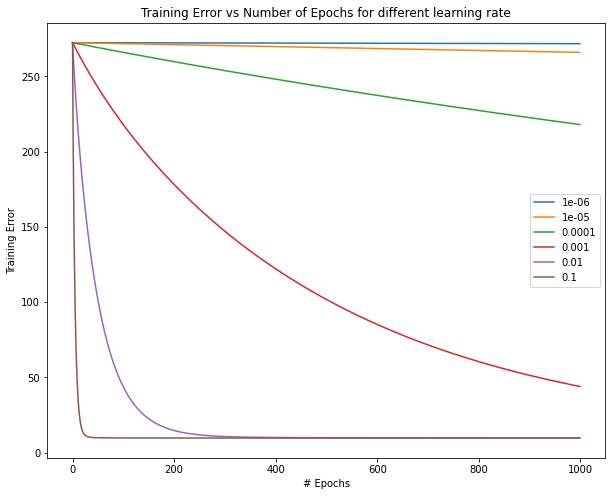

In [30]:
plt.figure(figsize = (10,8))
for alpha in [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]:
  cost, theta = BGD(X_train,y_train, alpha, epochs, l)
  print(cost.shape)
  plt.plot(cost, label = alpha)

plt.legend()
plt.title("Training Error vs Number of Epochs for different learning rate")
plt.xlabel('# Epochs')
plt.ylabel('Training Error')
plt.show()

The plot is in accordance with the statement stated above i.e for low learning rates, convergence is very slow while it's converging very quickly for high learning rate

### Question 5

Implement a mini-batch version with a batch_size constant B.  When B=1, it is stochastic gradient descent.  When B=#train data points, it is full-batch.  Anywhere in between is mini-batch.  

1. Choose B=1, B=16, B=128, B=256, and B=#data points and plot training error as a function of "# of gradient updates" and also separately as a function of "wall-clock time" for each value of B. [2]

2. All lines should be on the same plot. Which B leads to fastest convergence in terms of #gradient updates and in terms of "wall-clock time"? [1]

Implemented for 20 iterations and 200 iterations. Comparison is done at the end of each solution

In [31]:
import time
from datetime import datetime

In [32]:
def mini_batch(X,y,w,bs,iterations,alpha = 0.01,l = 0):
  
  n,m = X.shape  #n is the number of samples and m is number of features: fetaures include the bias as well (for this function)

  grad_update = 0
  train_error_iter = []
  train_error_mb = []
  time_taken = []
  cum_time = 0

  for i in range(iterations):
    start_time = time.time()
    

    data = np.hstack((X,y))
    data = np.random.permutation(data)

    X_shuffled = data[:,0:m]
    y_shuffled = data[:,-1]

    #mini batches
    for j in range(0,n,bs):
      #print(j)
      
        #the last mini batch takes the left-over samples as well
        if j+bs >= n:
          #print(j+bs)
          X_mini_batch = X_shuffled[j:]
          y_mini_batch = y_shuffled[j:]
        
        else:
          X_mini_batch = X_shuffled[j:j + bs]
          y_mini_batch = y_shuffled[j:j + bs]
        
        #print(X_mini_batch.shape[0])
        #print(y_mini_batch.shape[0])
        h = np.dot(X_mini_batch,w)
        y_mini_batch=y_mini_batch.reshape(X_mini_batch.shape[0],1)

        diff = h-y_mini_batch

        for k in range(X_mini_batch.shape[1]):
            J = np.dot(diff.T,X_mini_batch[:,k])
            grad = 1/(X_mini_batch.shape[0])*(J+ l*w[k])
            w[k] = w[k] - alpha*grad
        error = mse(y_shuffled, np.dot(X_shuffled, w))
        train_error_mb.append(error)
    
  

    y_pred = np.dot(X_shuffled, w)
    #print(y_pred)
    error = mse(y_shuffled, y_pred)
    train_error_iter.append(error)

    #time calculation
    end_time = time.time()
    time_diff = end_time - start_time
    cum_time = cum_time + time_diff
    time_taken.append(cum_time)

  return train_error_iter, train_error_mb, time_taken


Implementing batch gradient descent for 20 iterations and 200 iterations. Following plots are plotted:
1. Training Error vs number of gradient updates
2. Traning Error vs number of gradient updates (limiting max updates to 600)
3. Training Error vs time taken for all the iterations 
4. Training Error vs Epochs

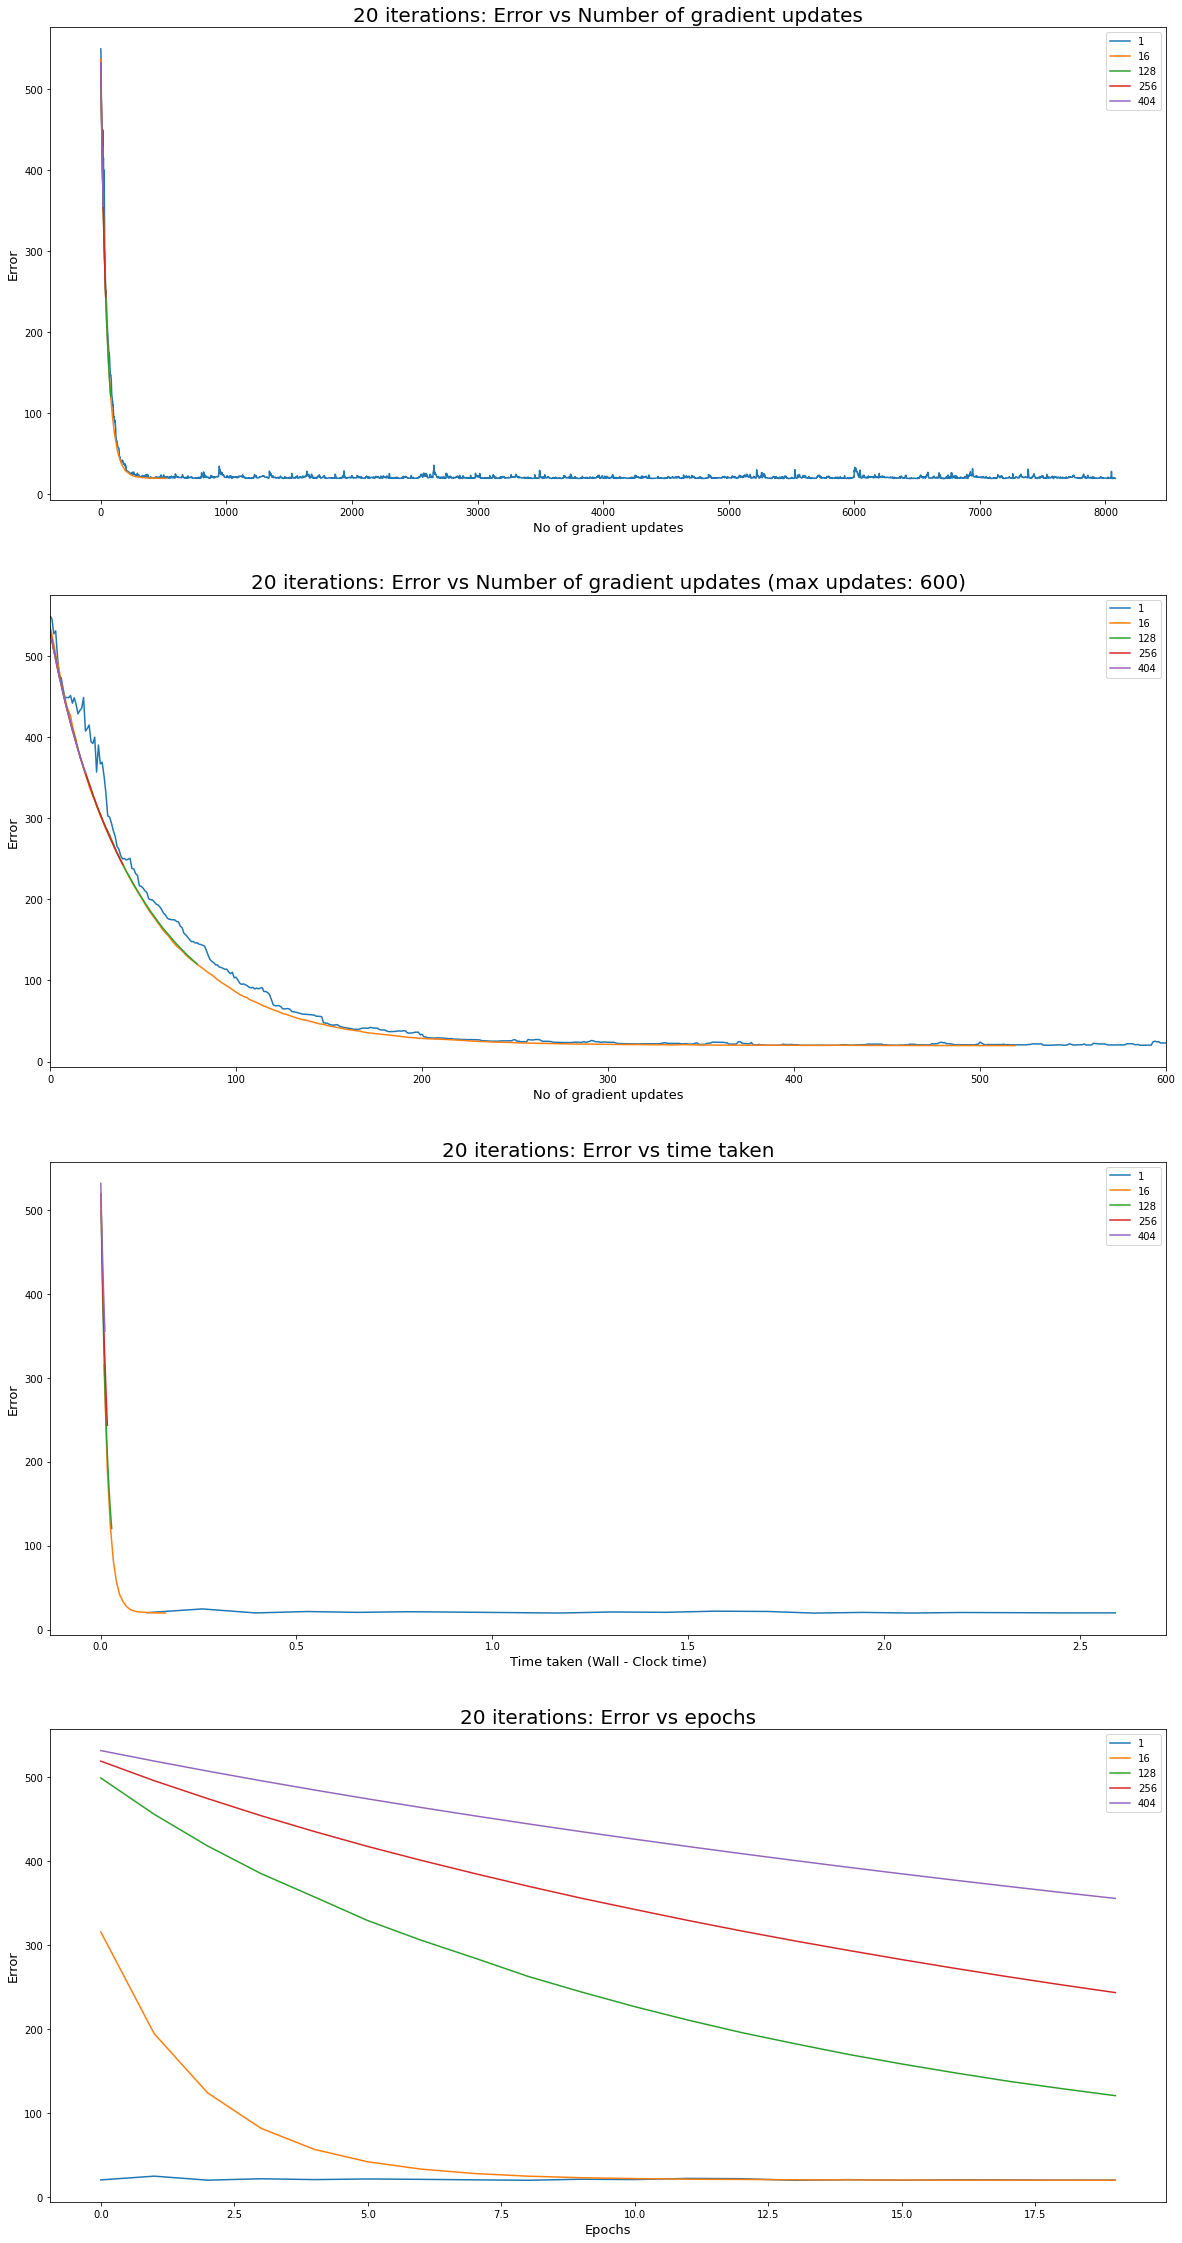

In [33]:
fig, ax = plt.subplots(4,1,figsize = (20,40))
for b in [1,16,128,256, 404]:
  np.random.seed(42)
  w = np.random.randn(14, 1)
  iterations = 20
  train_error_q5, train_error_mb_q5, time_taken = mini_batch(X_train,y_train,w,b,iterations, alpha = 0.01,l = 0)

  #plot of error vs gradient updates for all number of gradient updates
  ax[0].plot(train_error_mb_q5, label = b)

  #plot of error vs gradient updates for number of gradient updates = 600
  ax[1].plot(train_error_mb_q5, label = b)

  #plot of error vs gradient updates for number of gradient updates = 20
  #ax[2].plot(train_error_mb_q5, label = b)
  
  #plot of error vs time
  ax[2].plot(time_taken, train_error_q5, label = b)

  #plot of error vs epochs
  ax[3].plot(train_error_q5, label = b)

ax[0].set_title('20 iterations: Error vs Number of gradient updates', size = 20)
ax[1].set_title('20 iterations: Error vs Number of gradient updates (max updates: 600)', size = 20)
#ax[2].set_title('20 iterations: Error vs Number of gradient updates = 20', size = 20)
ax[2].set_title('20 iterations: Error vs time taken', size = 20)
ax[3].set_title('20 iterations: Error vs epochs', size = 20)

#ax[0].set_xlim([0,600])
ax[1].set_xlim([0,600])
#ax[2].set_xlim([0,20])
ax[0].legend(loc = 'upper right')
ax[1].legend(loc = 'upper right')
#ax[2].legend(loc = 'upper right')
ax[2].legend(loc = 'upper right')
ax[3].legend(loc = 'upper right')

ax[0].set_xlabel('No of gradient updates', size = 13)
ax[1].set_xlabel('No of gradient updates', size = 13)
#ax[2].set_xlabel('No of gradient updates', size = 13)
ax[2].set_xlabel('Time taken (Wall - Clock time)', size = 13)
ax[3].set_xlabel('Epochs', size = 13)

ax[0].set_ylabel('Error', size = 13)
ax[1].set_ylabel('Error', size = 13)
#ax[2].set_ylabel('Error', size = 13)
ax[2].set_ylabel('Error', size = 13)
ax[3].set_ylabel('Error', size = 13)

plt.show()

Thus for 20 iterations, we can observe that the curves for B = 404, B = 256, B = 128 have not converged while it's difficult to say which converges faster between B = 16 and B = 1 with number of gradient updates

The number of gradient updates are almost same for both the curves (B = 16 and B = 1)

Further on analyising the wall clock time graph for Errors, it can be said that B = 16 converges faster. However, the first iteration of B = 1 (Stochastic gradient descent) takes longer than all the iterations of B = 16 or more. Since weights are updated for every sample, the curve shows that error is alomost minimum in the very first iteration 

With respect to number of iterations, B = 16 takes apporx. 5 iterations to converge, B = 1 converges in 1st iterations and the rest of the batch size curves do no converge for 20 iterations

Now comparing it for more number of iterations (200) for better understanding. The B = 404 curve also converges and gives a better picture

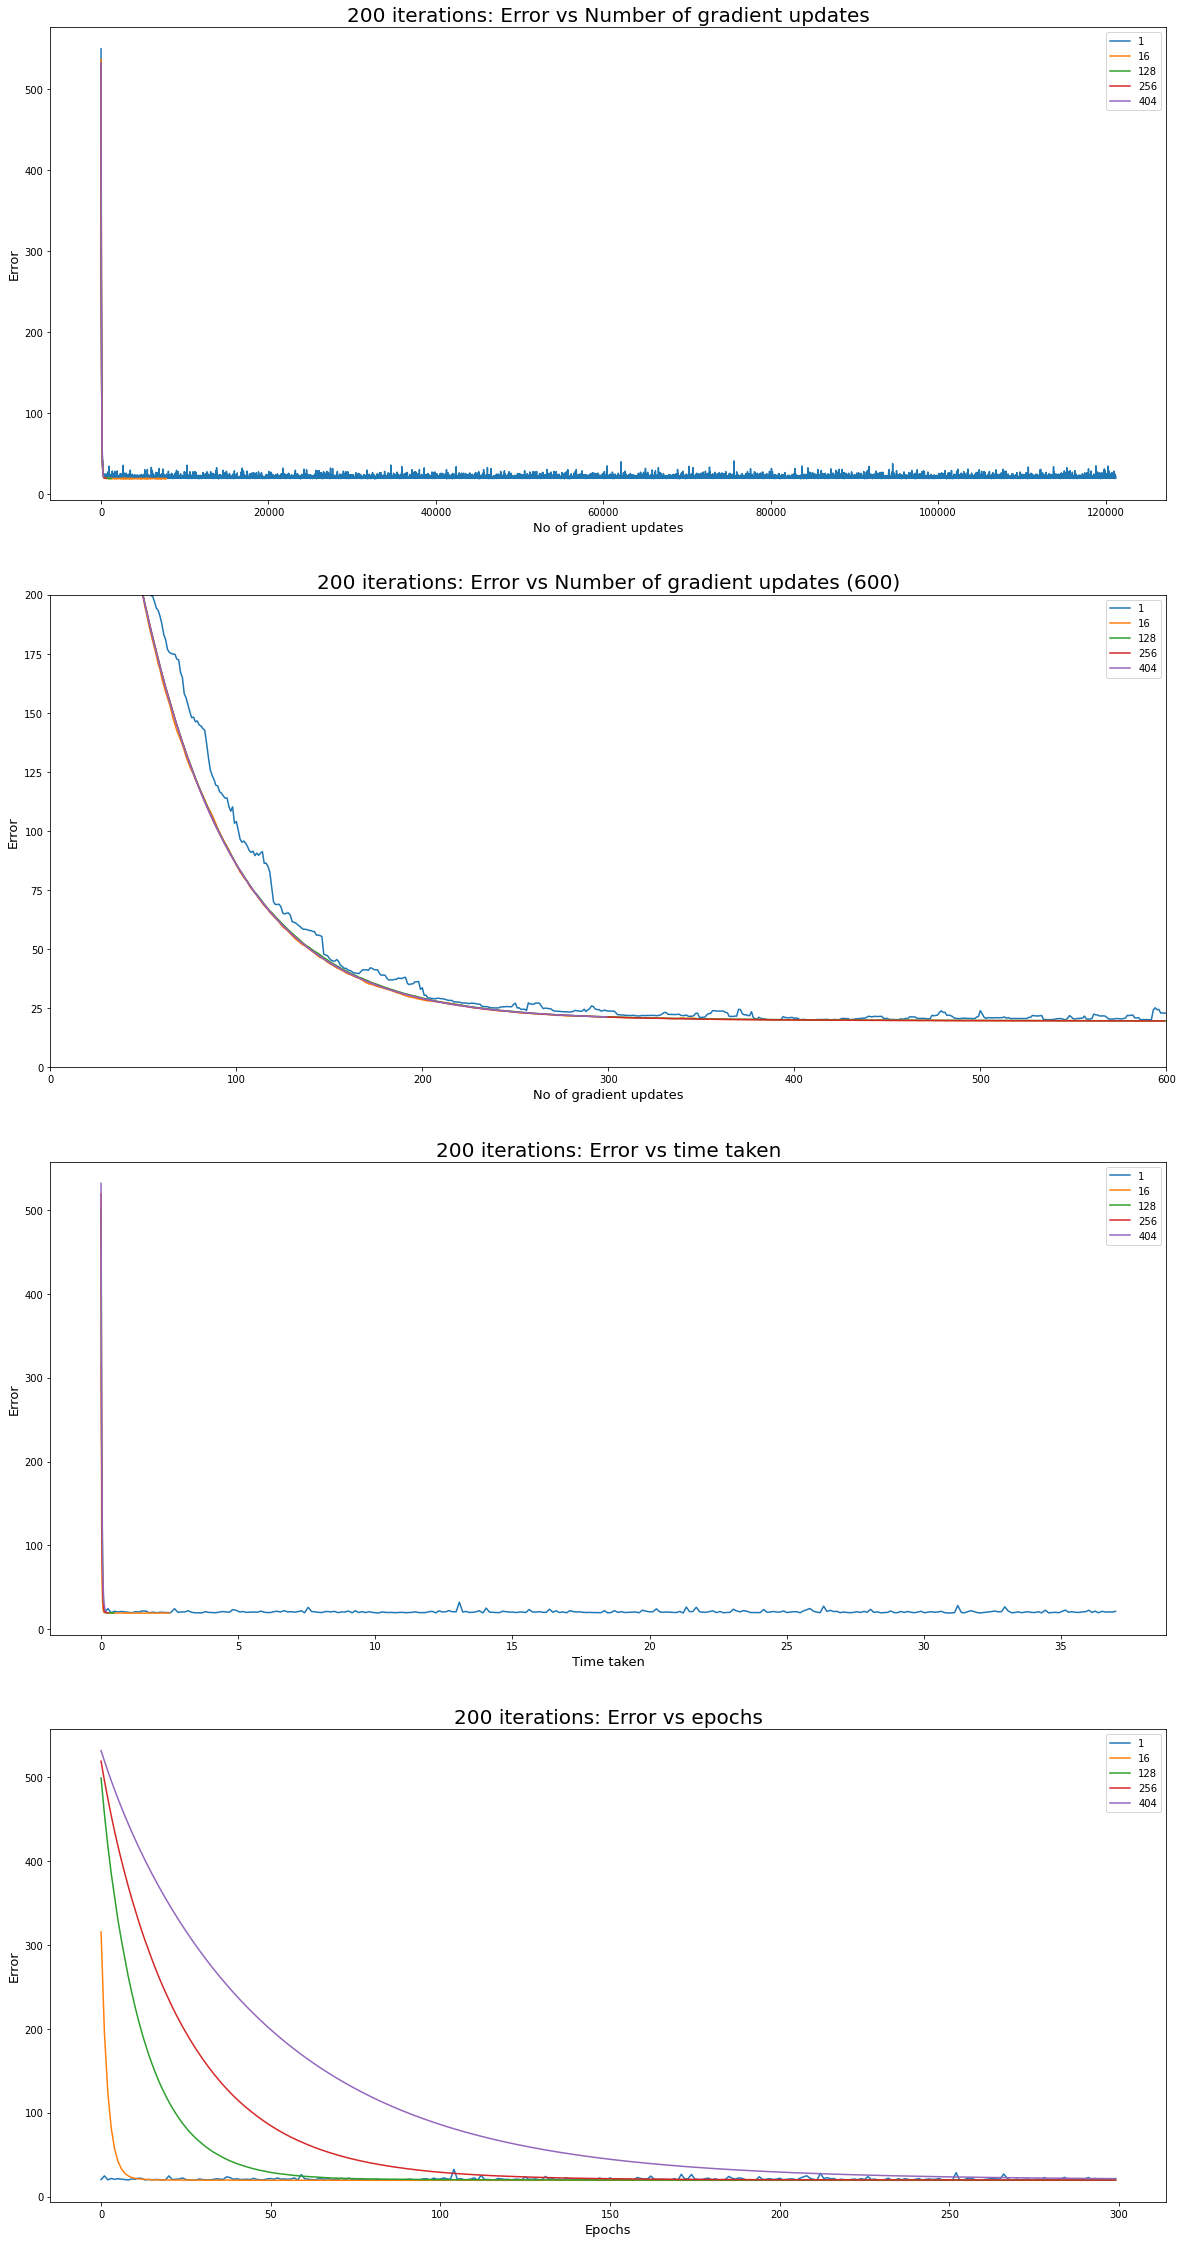

In [34]:
fig, ax = plt.subplots(4,1,figsize = (20,40))
for b in [1,16,128,256, 404]:
  np.random.seed(42)
  w = np.random.randn(14, 1)
  iterations = 300
  train_error_q5, train_error_mb_q5, time_taken = mini_batch(X_train,y_train,w,b,iterations, alpha = 0.01,l = 0)

  #plot of error vs gradient updates for all number of gradient updates
  ax[0].plot(train_error_mb_q5, label = b)

  #plot of error vs gradient updates for number of gradient updates = 600
  ax[1].plot(train_error_mb_q5, label = b)

  #plot of error vs gradient updates for number of gradient updates = 20
  #ax[2].plot(train_error_mb_q5, label = b)
  
  #plot of error vs time
  ax[2].plot(time_taken, train_error_q5, label = b)

  #plot of error vs epochs
  ax[3].plot(train_error_q5, label = b)

ax[0].set_title('200 iterations: Error vs Number of gradient updates', size = 20)
ax[1].set_title('200 iterations: Error vs Number of gradient updates (600)', size = 20)
#ax[2].set_title('20 iterations: Error vs Number of gradient updates = 20', size = 20)
ax[2].set_title('200 iterations: Error vs time taken', size = 20)
ax[3].set_title('200 iterations: Error vs epochs', size = 20)

#ax[0].set_xlim([0,600])
ax[1].set_xlim([0,600])
ax[1].set_ylim([0,200])
#ax[2].set_xlim([0,20])
ax[0].legend(loc = 'upper right')
ax[1].legend(loc = 'upper right')
ax[2].legend(loc = 'upper right')
ax[3].legend(loc = 'upper right')

ax[0].set_xlabel('No of gradient updates', size = 13)
ax[1].set_xlabel('No of gradient updates', size = 13)
#ax[2].set_xlabel('No of gradient updates', size = 13)
ax[2].set_xlabel('Time taken', size = 13)
ax[3].set_xlabel('Epochs', size = 13)

ax[0].set_ylabel('Error', size = 13)
ax[1].set_ylabel('Error', size = 13)
#ax[2].set_ylabel('Error', size = 13)
ax[2].set_ylabel('Error', size = 13)
ax[3].set_ylabel('Error', size = 13)

plt.show()

Now that all the curves converge in 200 iterations, following are the observations:

**With respect to number of gradient updates:**
It can not be differentiated as to which curve converged first, all of them seem to be converging together. 

Overall, nummber of gradient updates are more lesser batch size

**With respect to wall clock time:**
Again, by the time first iteration of B = 1 finishes, the error has already reached approximate minimum error.

Rest of the curves converge quickly

**With respect to number of iteration:**
Faster convergence is in the following order:
B = 1 > B = 16 > B = 128 > B = 256 > B = 404

i.e B = 404 takes maximum iterations to converge abd B = 1 takes least number of iterations to converge

### Question 6

1. Switch to absolute error for loss but still use $L_2$ regularization. Derive the gradient for this case, $\frac{\partial}{\partial \theta_j}J(\theta)$. [1.5]


2. Tune $\eta$ and B to obtain good performance (fast convergence to minimum error, but not noisy).  Is it easier to train with squared error or absolute error, why?  Show some plots that help you demonstrate this point and explain. [1]

answered at the end

Note: Please do not run the next cell

In [36]:
plt.figure(figsize = (20,18))
img = cv2.imread("Q6.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.axis('off')
plt.show()

error: ignored

<Figure size 1440x1296 with 0 Axes>

In [37]:
def mini_batch_abs_error(X,y,w,bs,iterations,alpha,l = 0):
  
  n,m = X.shape  #n is the number of samples and m is number of features: fetaures include the bias as well (for this function)

  grad_update = 0
  train_error_iter = []
  train_error_mb = []
  time_taken = []
  cum_time = 0

  for i in range(iterations):
    start_time = time.time()
    

    data = np.hstack((X,y))
    data = np.random.permutation(data)

    X_shuffled = data[:,0:m]
    y_shuffled = data[:,-1]

    #mini batches
    for j in range(0,n,bs):

        if j+bs >= n:
          X_mini_batch = X_shuffled[j:]
          y_mini_batch = y_shuffled[j:]
        
        else:
          X_mini_batch = X_shuffled[j:j + bs]
          y_mini_batch = y_shuffled[j:j + bs]
        
        #print(X_mini_batch.shape[0])
        #print(y_mini_batch.shape[0])
        h = np.dot(X_mini_batch,w)
        y_mini_batch=y_mini_batch.reshape(X_mini_batch.shape[0],1)

        diff = h-y_mini_batch
        
        diff_value = np.sign(diff) #returns -1 or 1 depending on sign

        for k in range(X_mini_batch.shape[1]):

            J = np.dot(diff_value.T,X_mini_batch[:,k])
            grad = 1/(2*X_mini_batch.shape[0])*(J+ 2*l*w[k])
            w[k] = w[k] - alpha*grad

        error = mse(y_shuffled, np.dot(X_shuffled, w))
        train_error_mb.append(error)
    
  

    y_pred = np.dot(X_shuffled, w)
    #print(y_pred)
    error = mse(y_shuffled, y_pred)
    train_error_iter.append(error)

    #time calculation
    end_time = time.time()
    time_diff = end_time - start_time
    cum_time = cum_time + time_diff
    time_taken.append(cum_time)

  return train_error_iter, train_error_mb, time_taken


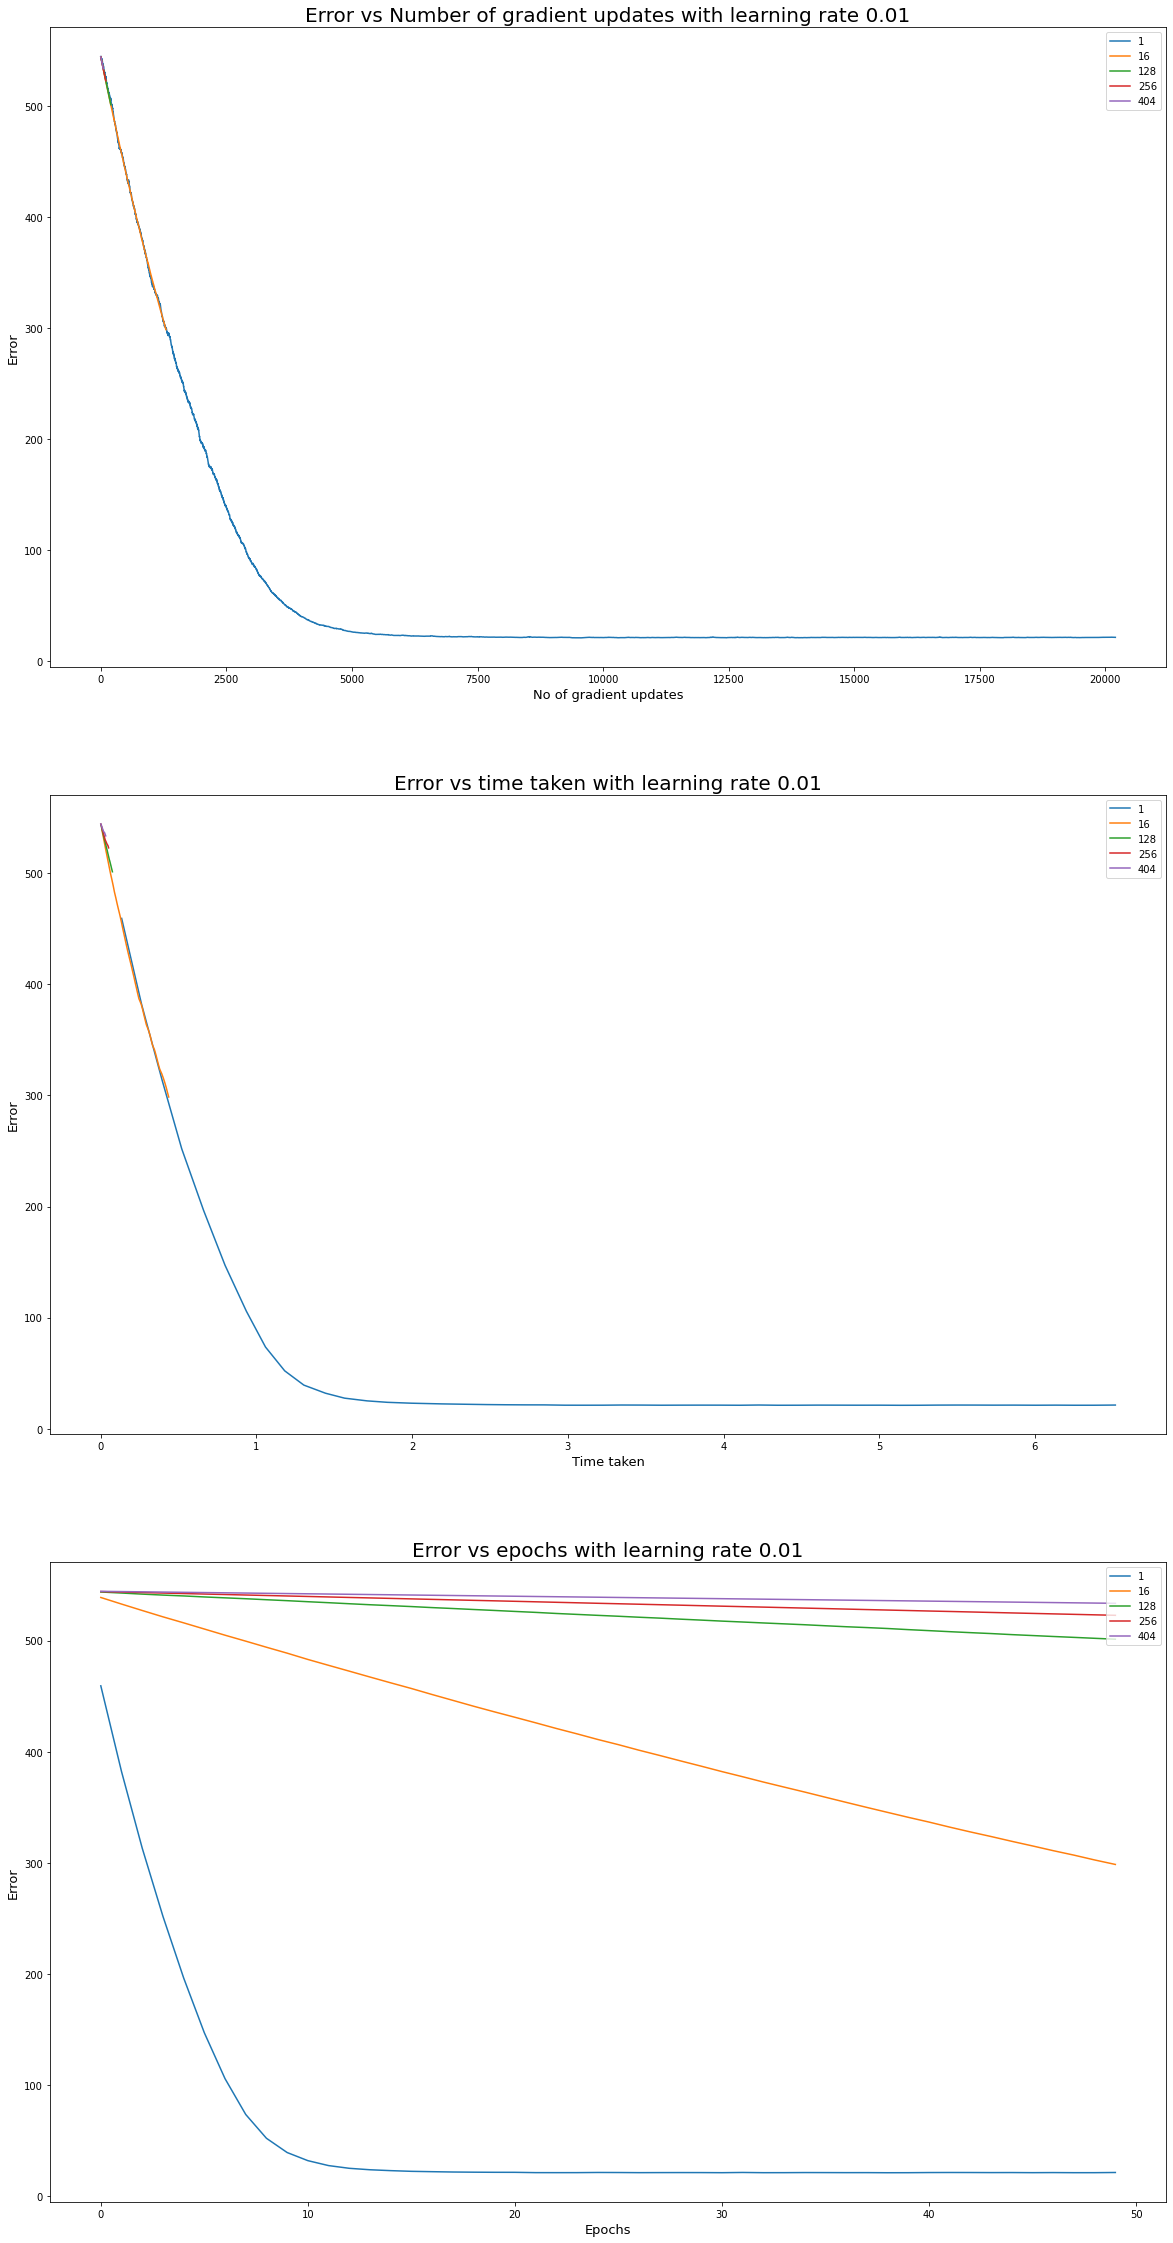

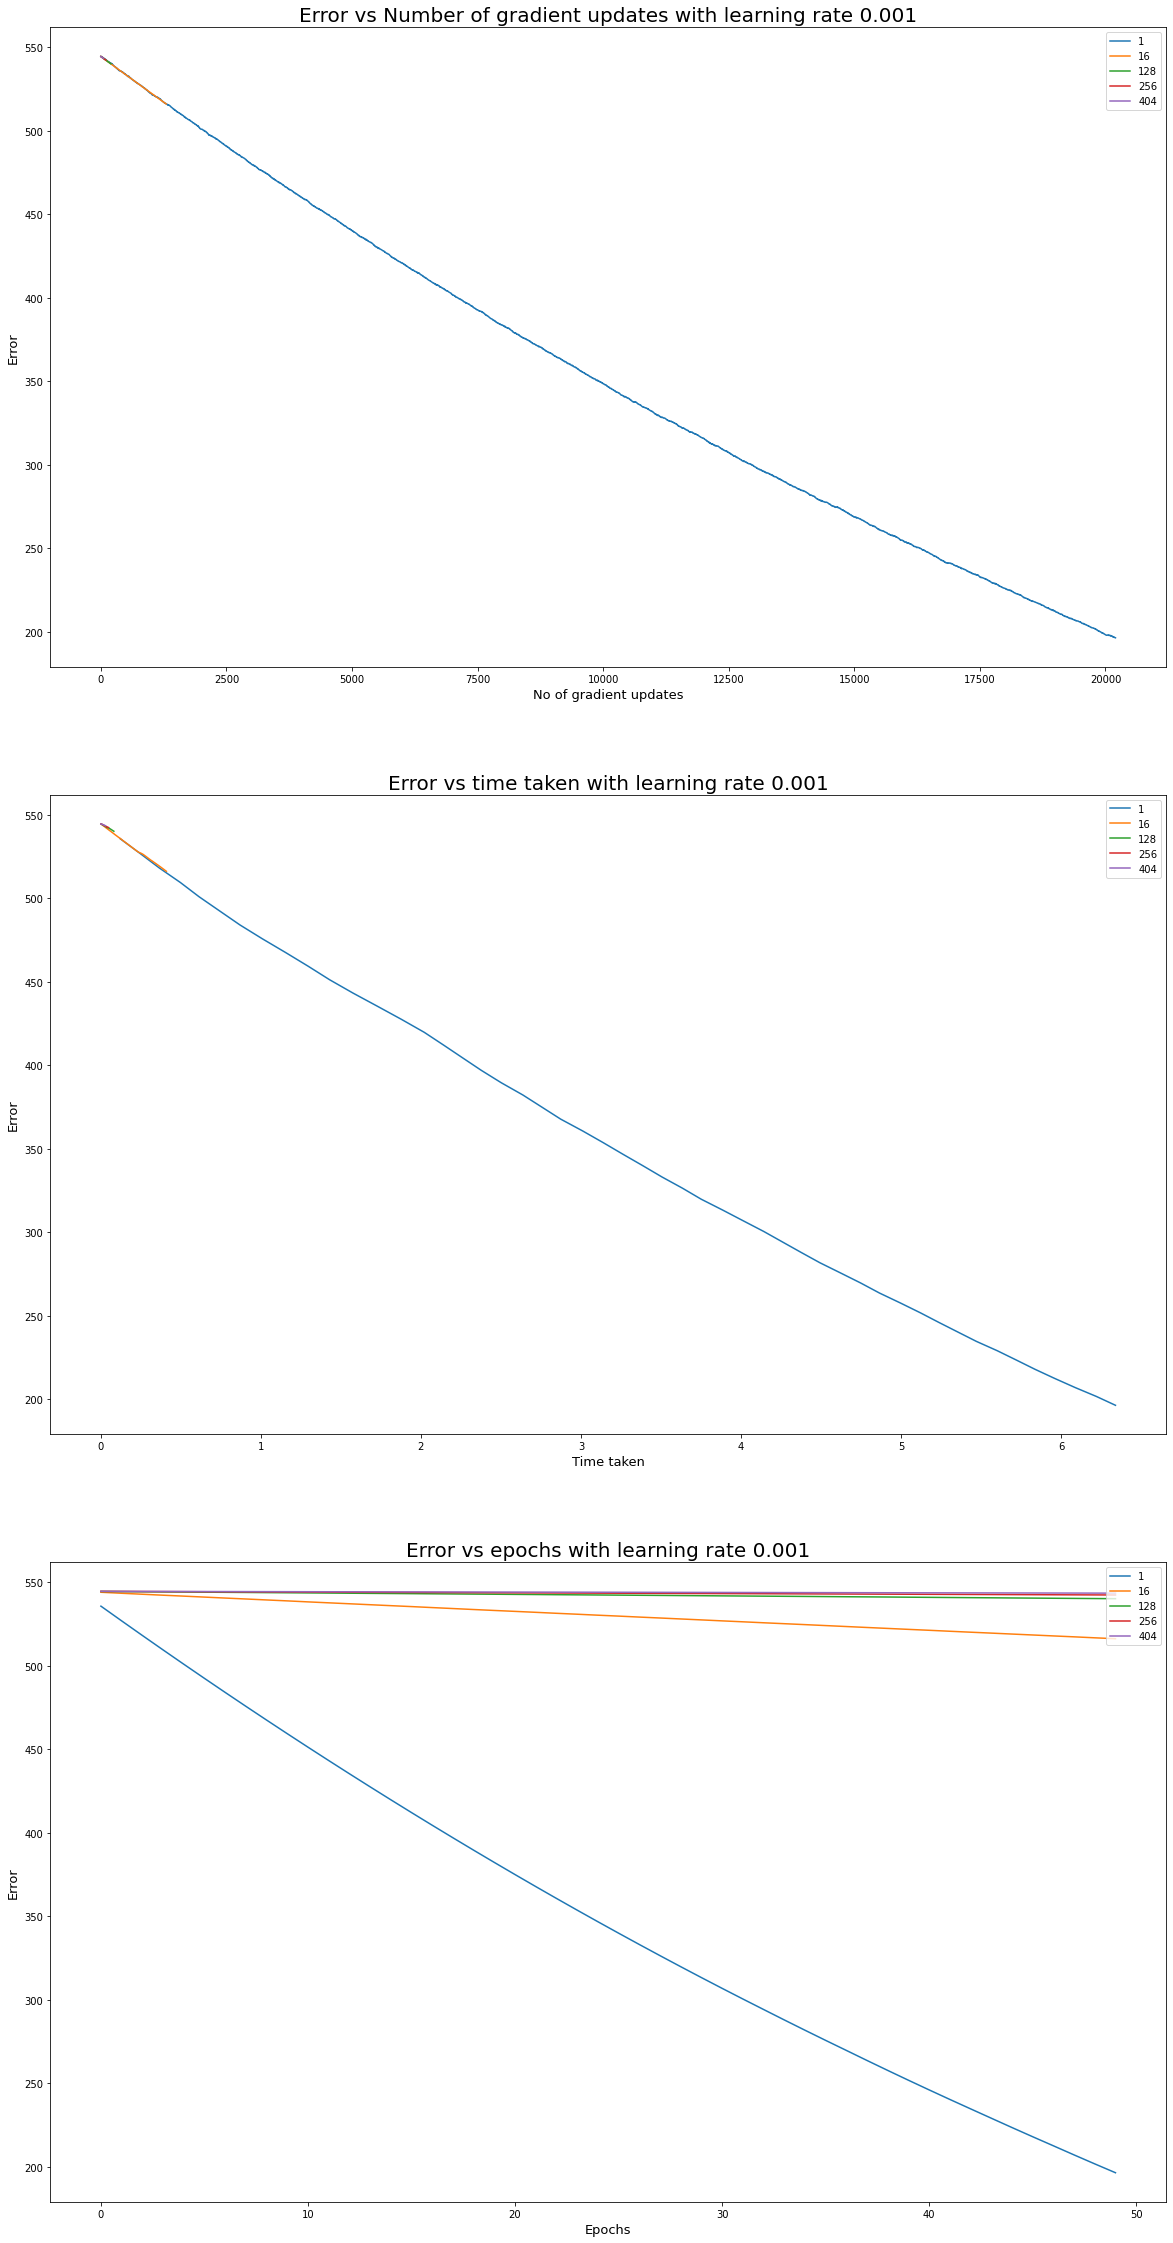

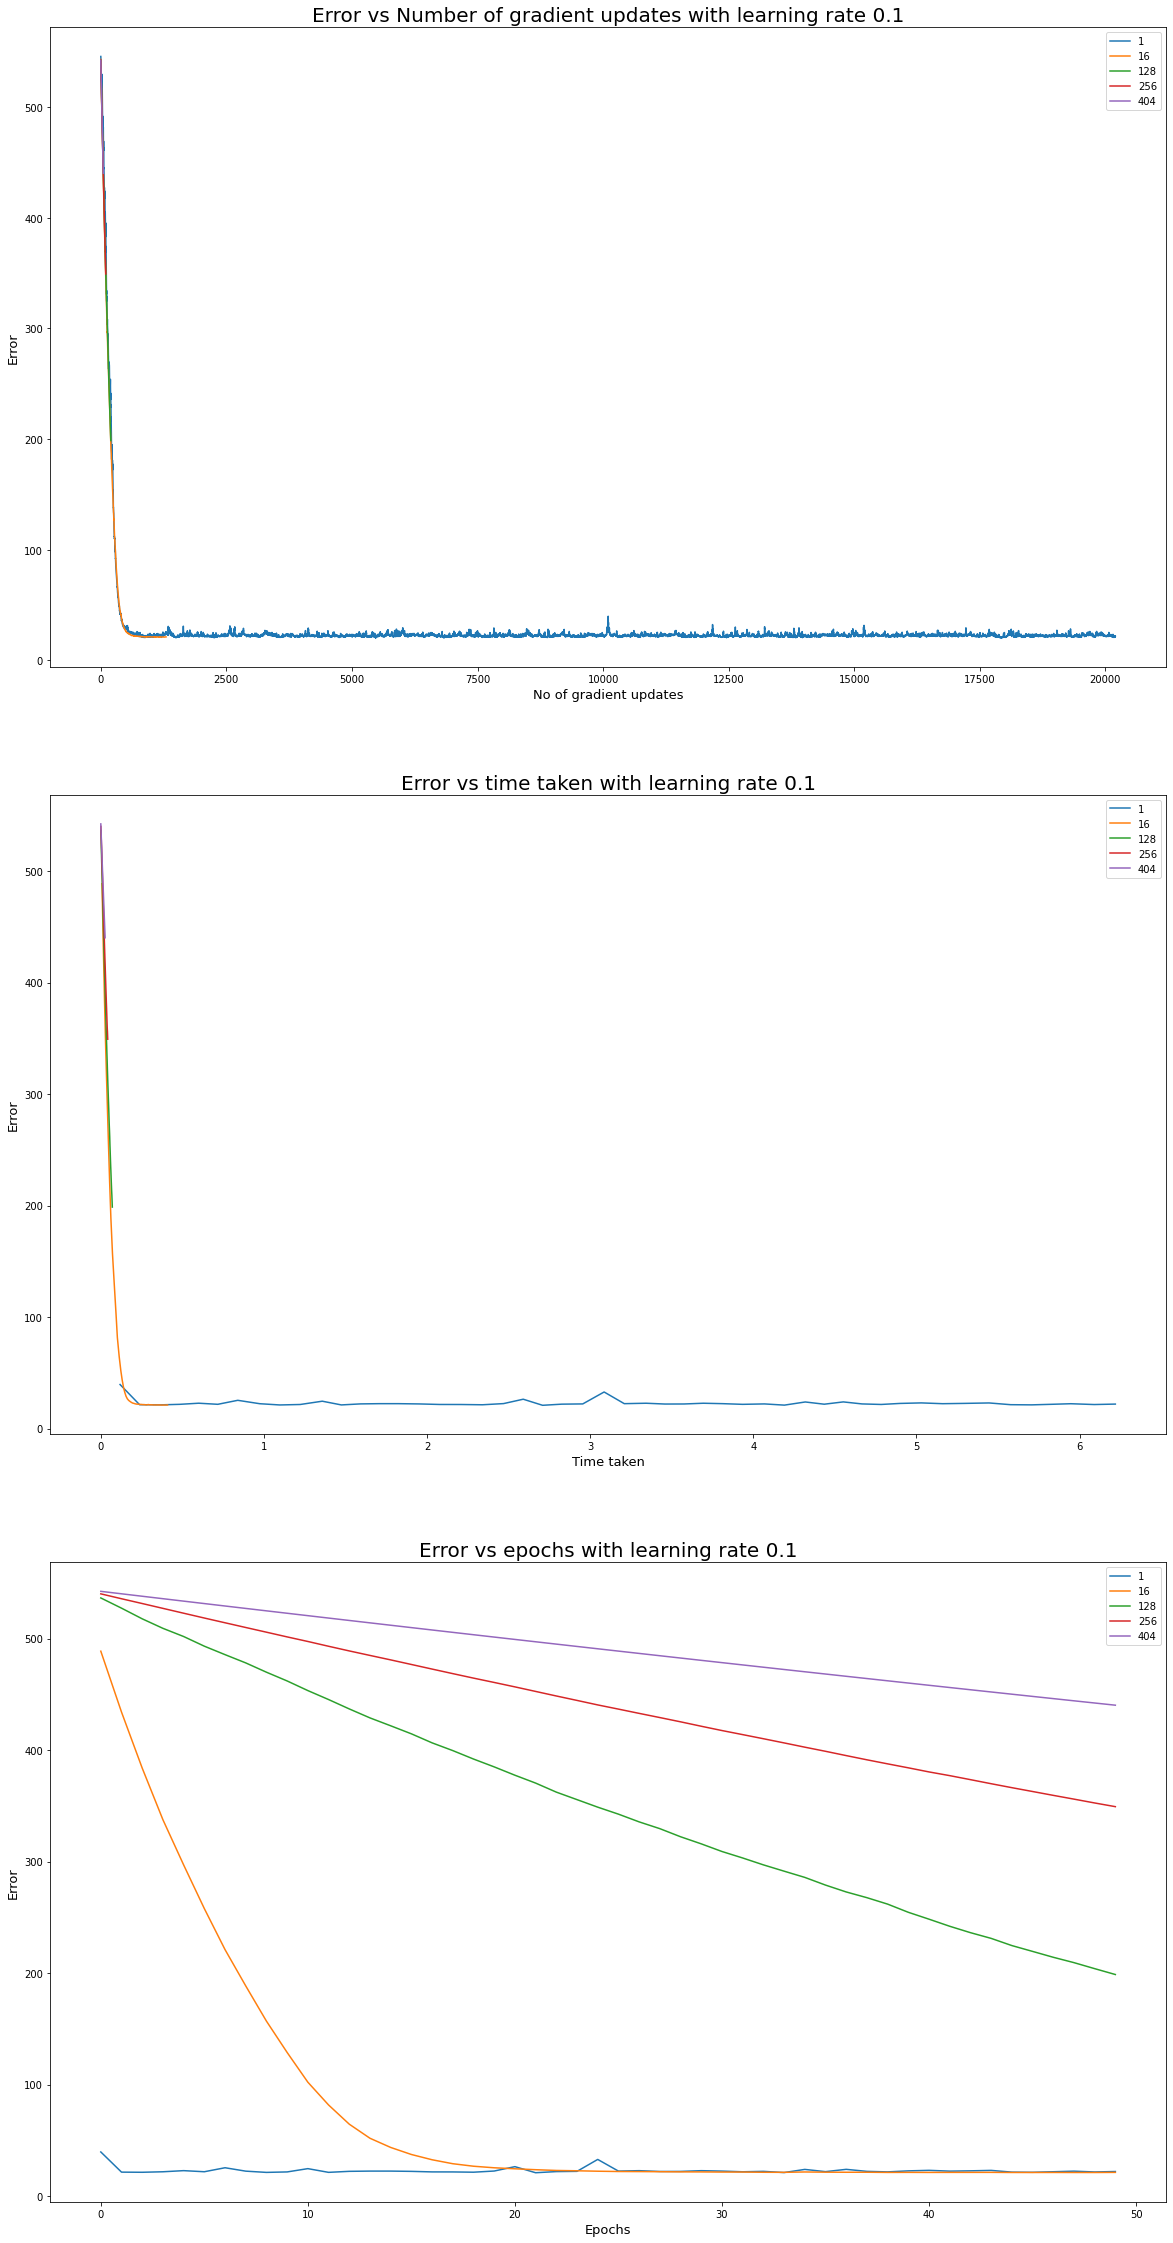

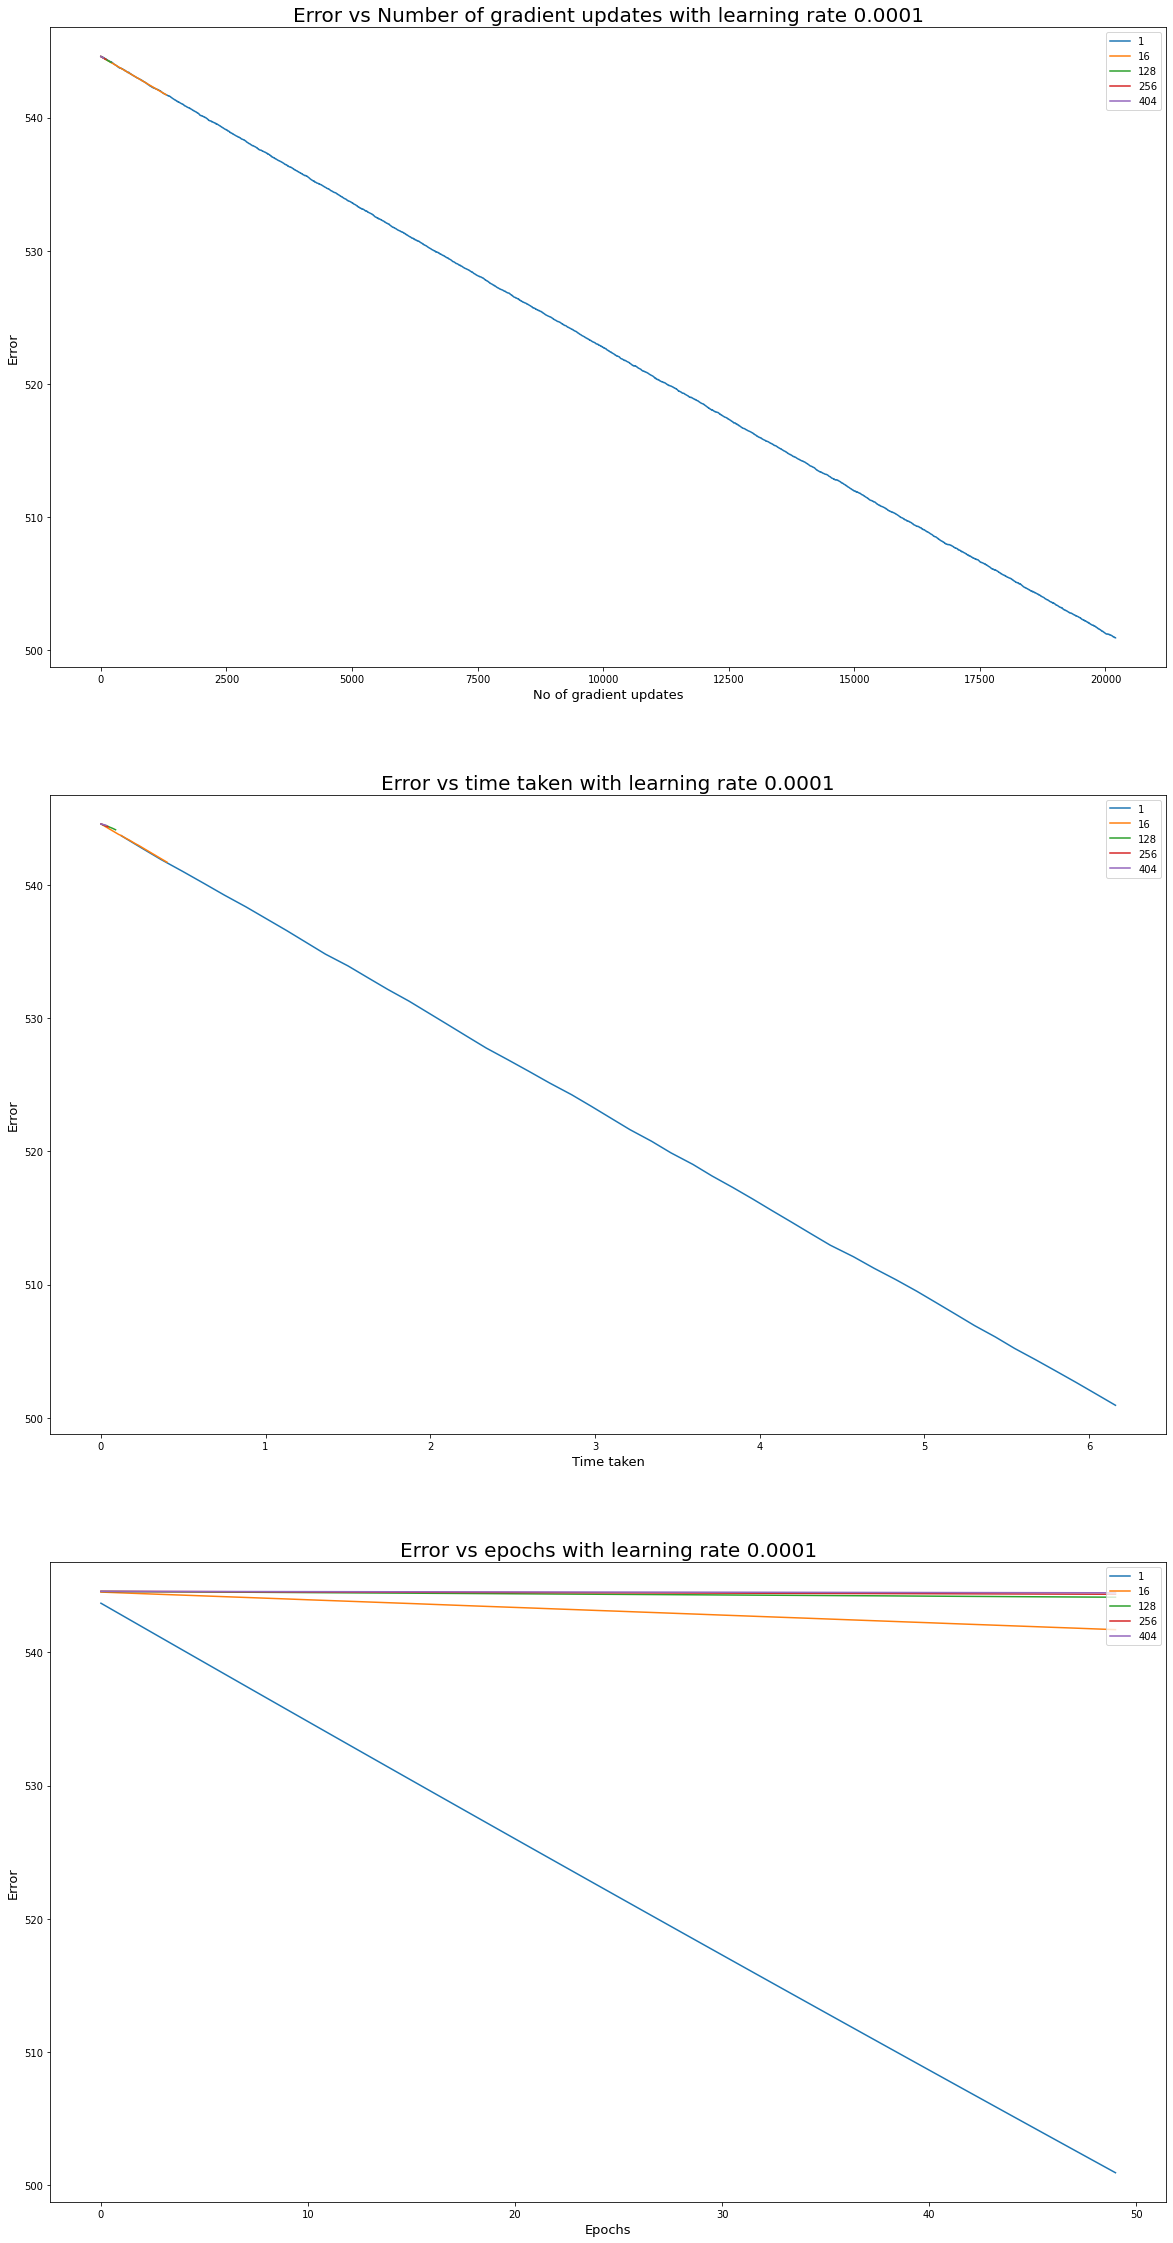

In [38]:
for alpha in [0.01, 0.001, 0.1, 0.0001]:

    fig, ax = plt.subplots(3,1,figsize = (20,40))
    for b in [1,16,128,256, 404]:
      np.random.seed(42)
      w = np.random.randn(14, 1)
      iterations = 50
      train_error_q6, train_error_mb_q6, time_taken = mini_batch_abs_error(X_train,y_train,w,b,iterations, alpha,l = 0)

      #plot of error vs gradient updates
      ax[0].plot(train_error_mb_q6, label = b)
      
      #plot of error vs time
      ax[1].plot(time_taken, train_error_q6, label = b)

      #plot of error vs epochs
      ax[2].plot(train_error_q6, label = b)

    ax[0].set_title('Error vs Number of gradient updates with learning rate {}'.format(alpha) , size = 20)
    ax[1].set_title('Error vs time taken with learning rate {}'.format(alpha), size = 20)
    ax[2].set_title('Error vs epochs with learning rate {}'.format(alpha), size = 20)

    #ax[0].set_xlim([0,600])
    ax[0].legend(loc = 'upper right')
    ax[1].legend(loc = 'upper right')
    ax[2].legend(loc = 'upper right')

    ax[0].set_xlabel('No of gradient updates', size = 13)
    ax[1].set_xlabel('Time taken', size = 13)
    ax[2].set_xlabel('Epochs', size = 13)

    ax[0].set_ylabel('Error', size = 13)
    ax[1].set_ylabel('Error', size = 13)
    ax[2].set_ylabel('Error', size = 13)

    plt.show()
  

Following is the analysis for different learning rate for iterations = 50:

0.1 - Noise with B = 1 

1e-3 and 1e-4 are too small learning rates and none of the curve is converging for 50 iterations

0.01 is the optimal learning rate when considered for 20 iterations



For learning rate 1e-2 and 50 iterations:
Only B = 1 converges

For learning rate 0.1 and 50 iterations: Both B = 1 and B = 16 converge; with B = 16 having faster convergence


**Which is better Absolute Error or squared error?** 

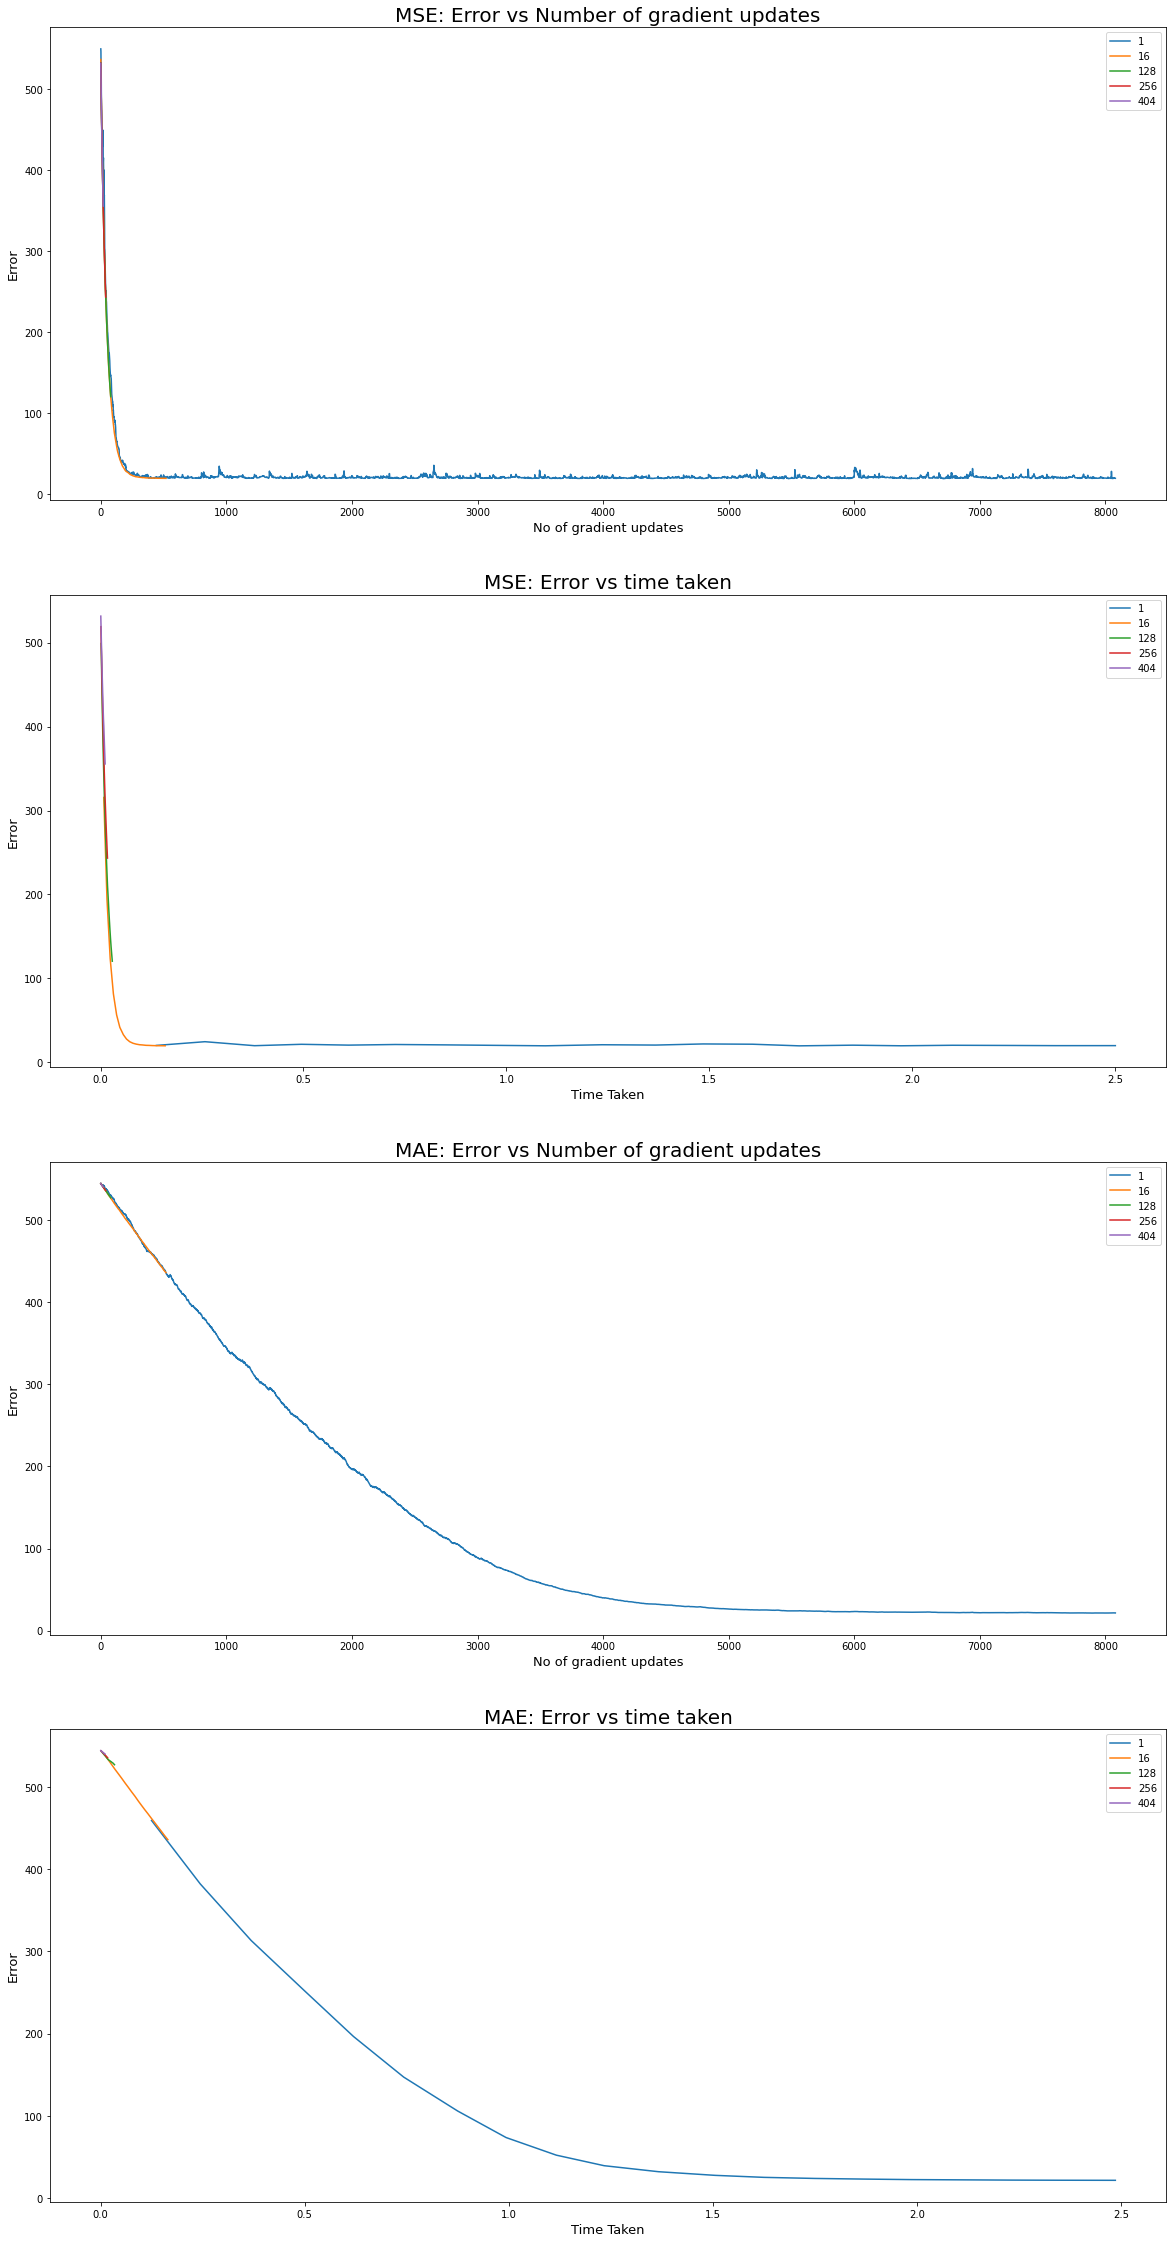

In [39]:
fig, ax = plt.subplots(4,1,figsize = (20,40))
for b in [1,16,128,256, 404]:
  np.random.seed(42)
  w = np.random.randn(14, 1)
  iterations = 20
  train_error_q5, train_error_mb_q5, time_taken = mini_batch(X_train,y_train,w,b,iterations, alpha = 0.01,l = 0)

  #plot of error vs gradient updates for all number of gradient updates
  ax[0].plot(train_error_mb_q5, label = b)

  
  #plot of error vs time
  ax[1].plot(time_taken, train_error_q5, label = b)


ax[0].set_title('MSE: Error vs Number of gradient updates', size = 20)
ax[1].set_title('MSE: Error vs time taken', size = 20)

for b in [1,16,128,256, 404]:
  np.random.seed(42)
  w = np.random.randn(14, 1)
  iterations = 20
  train_error_q6, train_error_mb_q6, time_taken = mini_batch_abs_error(X_train,y_train,w,b,iterations, 0.01,l = 0)

  #plot of error vs gradient updates for all number of gradient updates
  ax[2].plot(train_error_mb_q6, label = b)

  
  #plot of error vs time
  ax[3].plot(time_taken, train_error_q6, label = b)


ax[2].set_title('MAE: Error vs Number of gradient updates', size = 20)
ax[3].set_title('MAE: Error vs time taken', size = 20)



ax[0].legend(loc = 'upper right')
ax[1].legend(loc = 'upper right')
#ax[2].legend(loc = 'upper right')
ax[2].legend(loc = 'upper right')
ax[3].legend(loc = 'upper right')

ax[0].set_xlabel('No of gradient updates', size = 13)
ax[1].set_xlabel('Time Taken', size = 13)
#ax[2].set_xlabel('No of gradient updates', size = 13)
ax[2].set_xlabel('No of gradient updates', size = 13)
ax[3].set_xlabel('Time Taken', size = 13)

ax[0].set_ylabel('Error', size = 13)
ax[1].set_ylabel('Error', size = 13)
#ax[2].set_ylabel('Error', size = 13)
ax[2].set_ylabel('Error', size = 13)
ax[3].set_ylabel('Error', size = 13)

plt.show()

Comparing for same learning rate 0.01 and same number of iterations(20):

Squared error is better than absolute error as it helps in faster in convergence and hence easier
>Takes approx 4000 updates for absolute error with batch size B = 1 in comparison to less than 500 gradient updates for same batch size)

>Absolute error takes 1.5 seconds to converge while squared error converges quckly

It can be concluded that squared error can have high gradient descent for outliers and minima can be found faster 
